In [7]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import numpy as np

In [25]:
# File Path
BASE_DIR = Path().resolve().parents[1]
file_PATH = BASE_DIR / "data" / "processed" / "whole_data_merged.csv"

# Load the merged dataset
df = pd.read_csv(file_PATH)

# Filter for World data with temperature available
df_world = df[(df["country"].str.upper() == "WORLD") & (df["year"] >= 1965)]
# df_world = df_world.dropna(subset=["global_temp_c"])

In [41]:

# Select only relevant numeric columns
# cols_of_interest = [
#    "co2", "global_temp_c", "primary_energy_consumption_twh",
#    "energy_per_capita_kwh",
#    "coal_co2", "gas_co2", "oil_co2", "land_use_change_co2"
#]

cols_of_interest = [
    "co2", "global_temp_c", 
    "primary_energy_consumption_twh", "land_use_change_co2"
]

df_corr_data = df_world[cols_of_interest].dropna()

print("✅ Correlation-ready rows:", len(df_corr_data))

✅ Correlation-ready rows: 59


In [42]:
# 1️⃣ Pearson Correlation Matrix
pearson_corr = df_corr_data.corr(method="pearson")

# 2️⃣ Spearman Correlation Matrix
spearman_corr = df_corr_data.corr(method="spearman")

In [43]:
# 💠 Extract correlations of interest

def extract_target_corr(matrix, target):
    return matrix.loc[[target]].drop(columns=[target]).T.rename(columns={target: f"{target}_correlation"})

co2_vs_all_pearson = extract_target_corr(pearson_corr, "co2")
temp_vs_all_pearson = extract_target_corr(pearson_corr, "global_temp_c")

co2_vs_all_spearman = extract_target_corr(spearman_corr, "co2")
temp_vs_all_spearman = extract_target_corr(spearman_corr, "global_temp_c")

In [44]:
# 📊 Print correlation tables (replace display_dataframe_to_user)
print("📊 CO₂ vs Other Variables (Pearson):")
print(co2_vs_all_pearson)

print("\n📊 Temp vs Other Variables (Pearson):")
print(temp_vs_all_pearson)

print("\n📊 CO₂ vs Other Variables (Spearman):")
print(co2_vs_all_spearman)

print("\n📊 Temp vs Other Variables (Spearman):")
print(temp_vs_all_spearman)

📊 CO₂ vs Other Variables (Pearson):
                                co2_correlation
global_temp_c                          0.944666
primary_energy_consumption_twh         0.997739
land_use_change_co2                   -0.444353

📊 Temp vs Other Variables (Pearson):
                                global_temp_c_correlation
co2                                              0.944666
primary_energy_consumption_twh                   0.954149
land_use_change_co2                             -0.440344

📊 CO₂ vs Other Variables (Spearman):
                                co2_correlation
global_temp_c                          0.958898
primary_energy_consumption_twh         0.997545
land_use_change_co2                   -0.309877

📊 Temp vs Other Variables (Spearman):
                                global_temp_c_correlation
co2                                              0.958898
primary_energy_consumption_twh                   0.959219
land_use_change_co2                             -0.317509


C:\Users\Sathvik\AppData\Local\Temp\ipykernel_24252\201364889.py:5: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sathvik\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


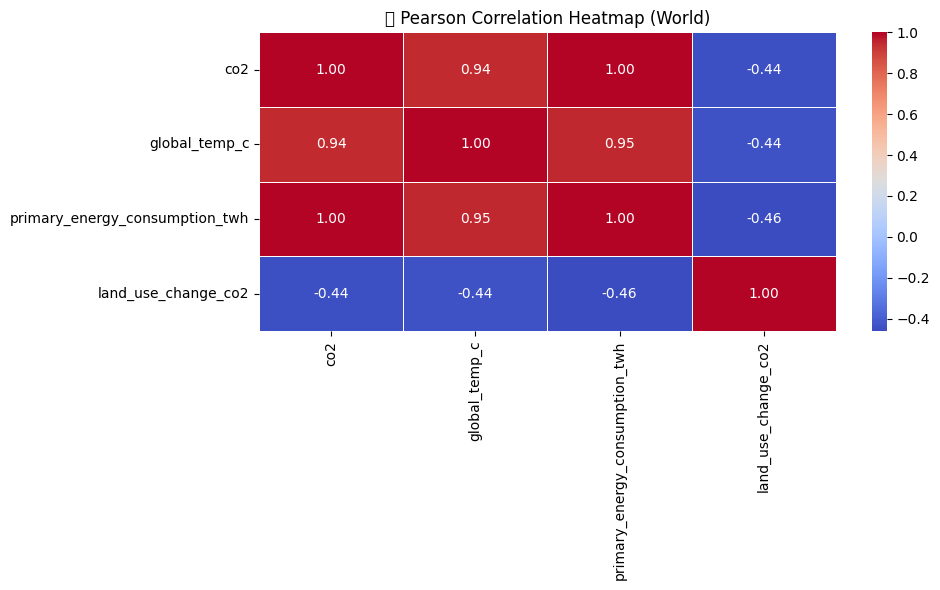

In [45]:
# 3️⃣ Heatmap of Pearson Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📈 Pearson Correlation Heatmap (World)")
plt.tight_layout()
plt.show()

C:\Users\Sathvik\AppData\Local\Temp\ipykernel_24252\4016774293.py:5: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sathvik\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


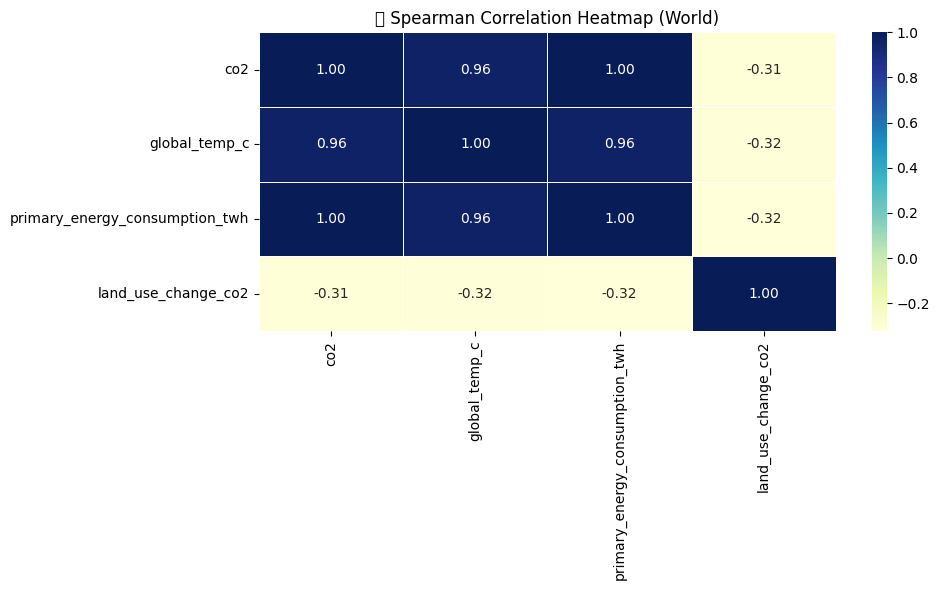

In [46]:
# 4️⃣ Heatmap of Spearman Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("📈 Spearman Correlation Heatmap (World)")
plt.tight_layout()
plt.show()